___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [58]:
df = pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [59]:
df.shape

(17414, 10)

### 3.Check missing values and if there are any dublicate rows or not.

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.shape

(17414, 10)

In [62]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [63]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

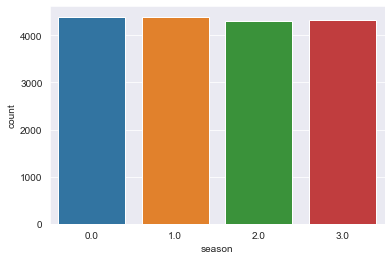

In [64]:
sns.countplot(data = df, x = 'season');

In [65]:
# season

#result

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

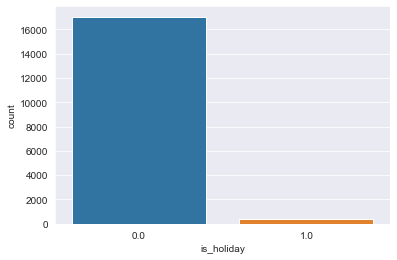

In [66]:
sns.countplot(data = df, x = 'is_holiday')

In [67]:
# is_holiday


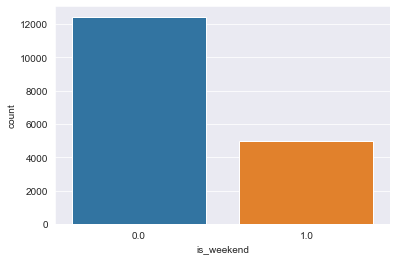

In [68]:
sns.countplot(data = df, x = 'is_weekend');

In [69]:
# is_weekend


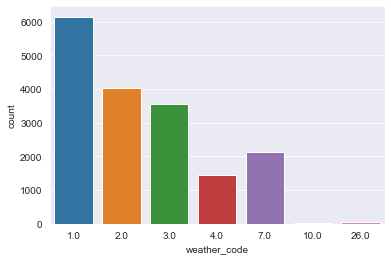

In [70]:
sns.countplot(data = df, x = 'weather_code');

In [71]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [72]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [73]:
df.timestamp = pd.to_datetime(df.timestamp)

In [74]:
df.timestamp.dtypes

dtype('<M8[ns]')

In [75]:
df.set_index('timestamp', inplace=True)

In [76]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [77]:
df.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [78]:
df['year_month'] = df.index.strftime('%Y-%m')

In [79]:
df['year'] = df.index.strftime('%Y').astype('int64')

In [80]:
df['month'] = df.index.strftime('%m').astype('int64')

In [81]:
df['day_of_month'] = df.index.strftime('%d').astype('int64')

In [82]:
df['day_of_week'] = df.index.strftime('%w').astype('int64')

In [83]:
df['hour'] = df.index.strftime('%H').astype('int64')

In [84]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,0,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,4


you can use strftime('%Y-%m') for year_mount

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  hour          17414 non-null  int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 2.1+ MB


In [86]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,0,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,4


### 7.Visualize the correlation with a heatmap

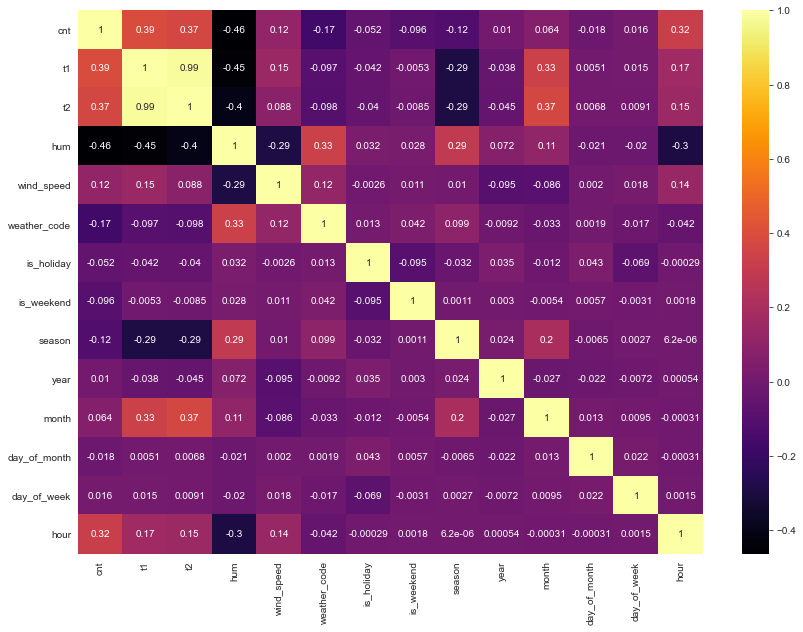

In [87]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='inferno');

In [88]:
# for all variables 


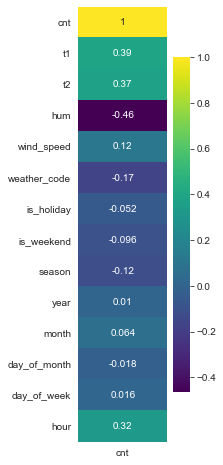

In [89]:
plt.figure(figsize=(2,8));
sns.heatmap(df.corr().loc[:,['cnt']], annot=True, cmap='viridis');

In [90]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [91]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year_month', 'year', 'month', 'day_of_month',
       'day_of_week', 'hour'],
      dtype='object')

In [92]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
year_month       object
year              int64
month             int64
day_of_month      int64
day_of_week       int64
hour              int64
dtype: object

In [93]:
df.corr().cnt.sort_values()


hum            -0.462901
weather_code   -0.166633
season         -0.116180
is_weekend     -0.096499
is_holiday     -0.051698
day_of_month   -0.017887
year            0.010046
day_of_week     0.016346
month           0.063757
wind_speed      0.116295
hour            0.324423
t2              0.369035
t1              0.388798
cnt             1.000000
Name: cnt, dtype: float64

<AxesSubplot:>

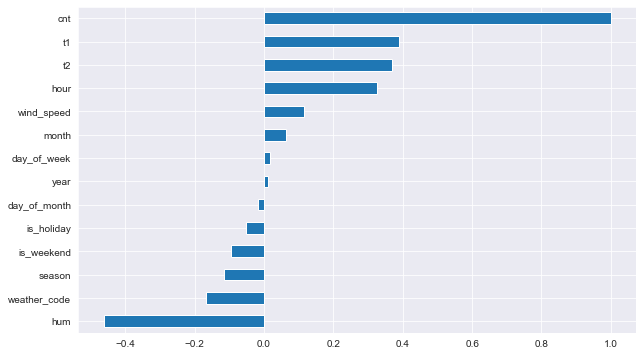

In [94]:
plt.figure(figsize=(10,6))
df.corr().cnt.sort_values().plot.barh()

### 9.Plot bike shares over time use lineplot

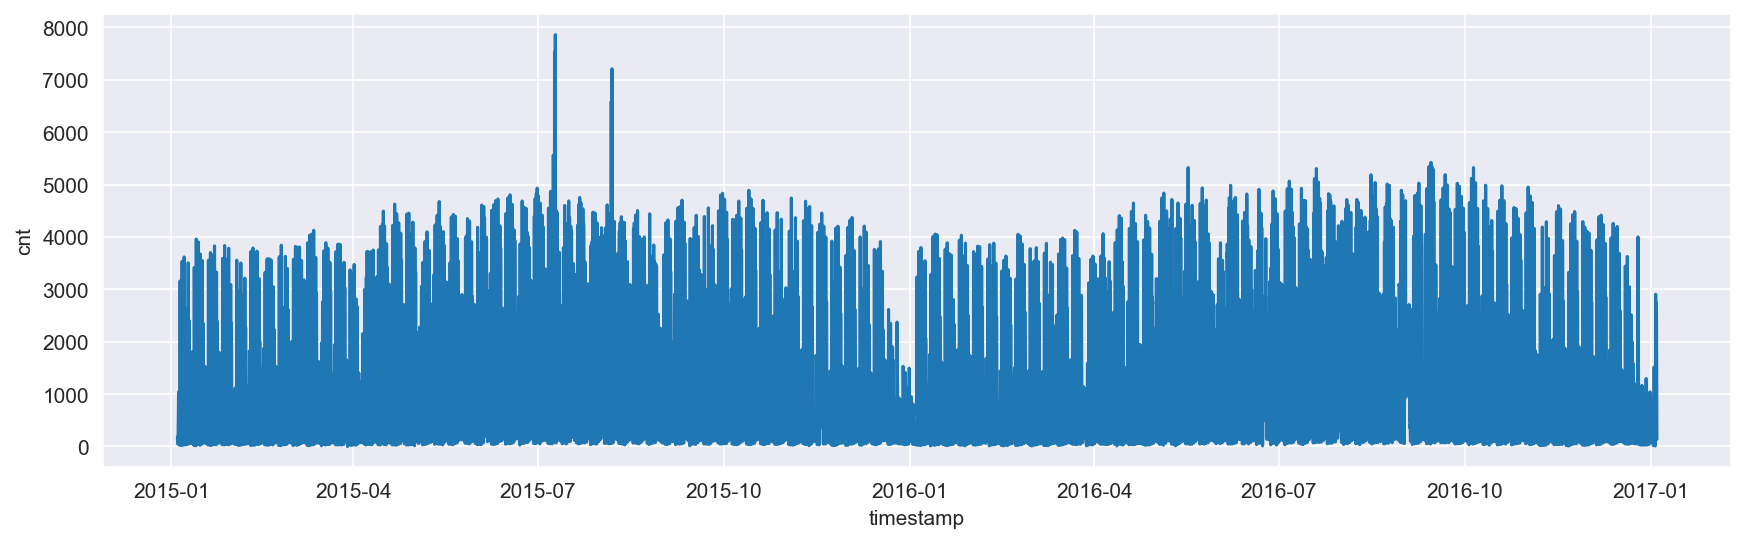

In [95]:
plt.figure(figsize=(14,4),dpi = 150)
sns.lineplot(data = df, x = df.index, y = df.cnt);

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

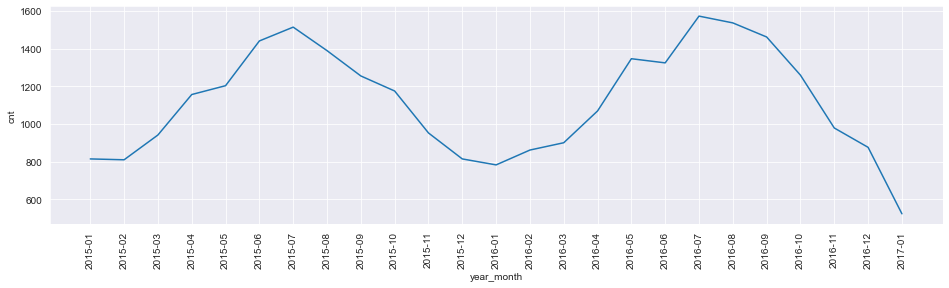

In [96]:
plt.figure(figsize=(16,4))
sns.lineplot(data = df, x = 'year_month', y = 'cnt', ci = None)
plt.xticks(rotation = 90);

In [41]:
# with lineplot


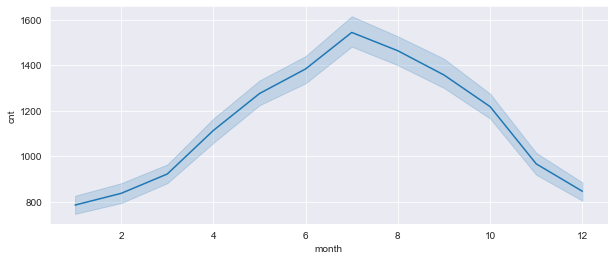

In [97]:
plt.figure(figsize=(10,4))
sns.lineplot(data = df, x = 'month', y = 'cnt');


In [43]:
# with lineplot


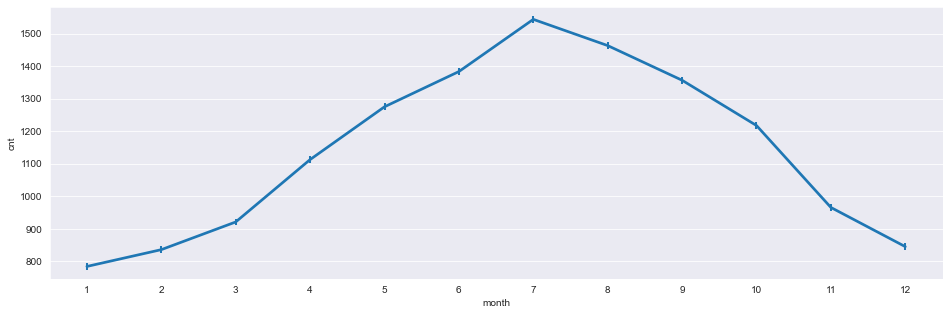

In [98]:
plt.figure(figsize=(16,5))
sns.pointplot(data = df, x = 'month', y = 'cnt', ci = None, markers= '|');


In [45]:
# with pointplot


In [99]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

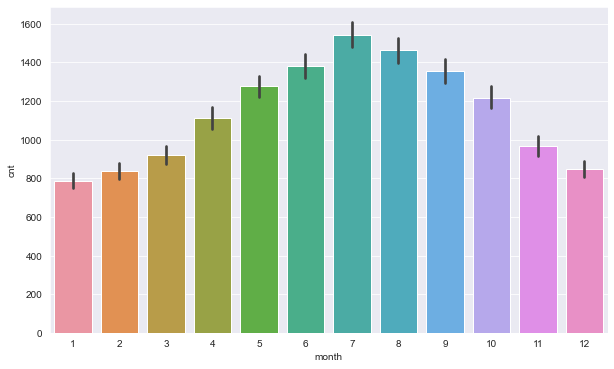

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="month", y="cnt");

In [48]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

In [49]:
df.head(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,0,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,0,1


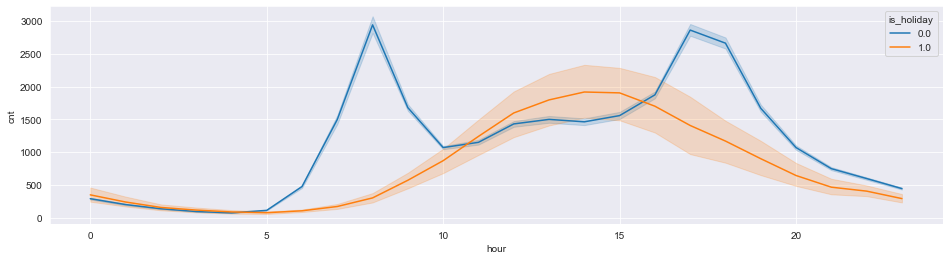

In [50]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x="hour", y="cnt", hue="is_holiday");

In [51]:
# with lineplot (*whether it is a holiday or not*)


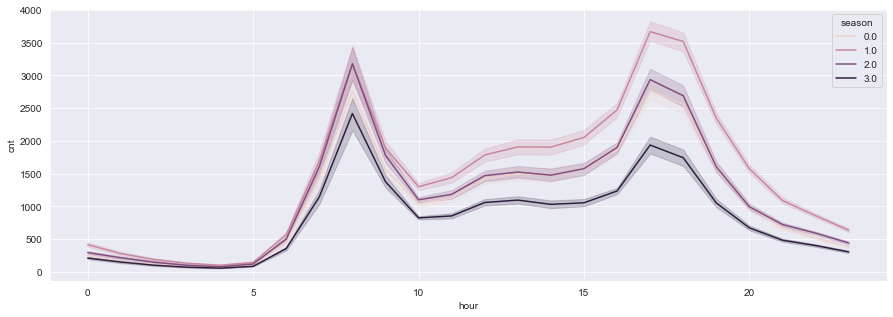

In [52]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="hour", y="cnt", hue="season");

In [53]:
# with lineplot (*You may want to see seasonal breakdowns*)


In [101]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year_month', 'year', 'month', 'day_of_month',
       'day_of_week', 'hour'],
      dtype='object')

AttributeError: 'numpy.ndarray' object has no attribute 'catplot'

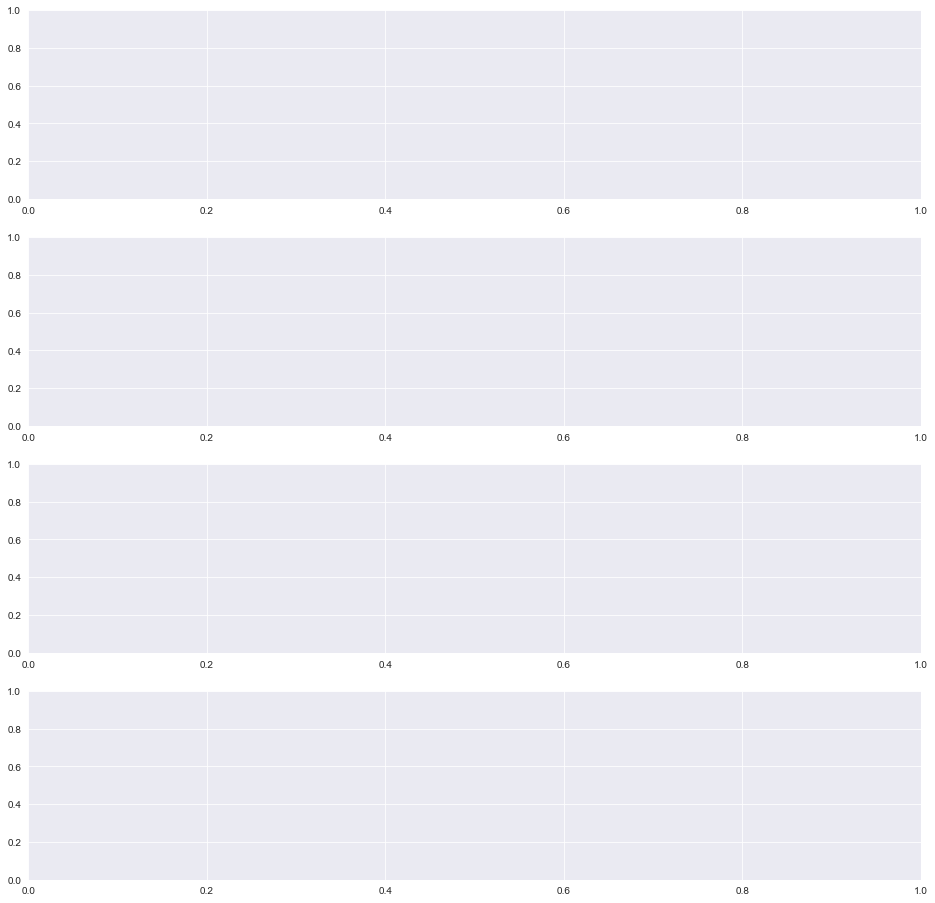

In [100]:
fig, ax= plt.subplots(4,1, figsize=(16,16))
ax.catplot()
sns.pointplot(data=df, x="hour", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="hour", y="cnt",hue="is_holiday",ax=ax[1])
sns.pointplot(data=df, x="hour", y="cnt",hue="is_weekend",ax=ax[2])
sns.pointplot(data=df, x="hour", y="cnt",hue="season",ax=ax[3])
plt.tight_layout();

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

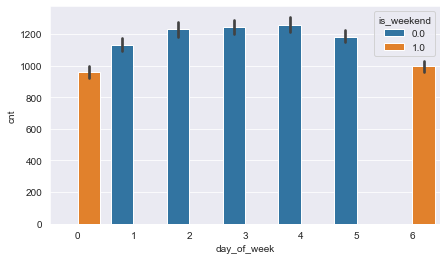

In [102]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x="day_of_week", y="cnt", hue="is_weekend")

In [ ]:
# with barplot


In [104]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year_month', 'year', 'month', 'day_of_month',
       'day_of_week', 'hour'],
      dtype='object')

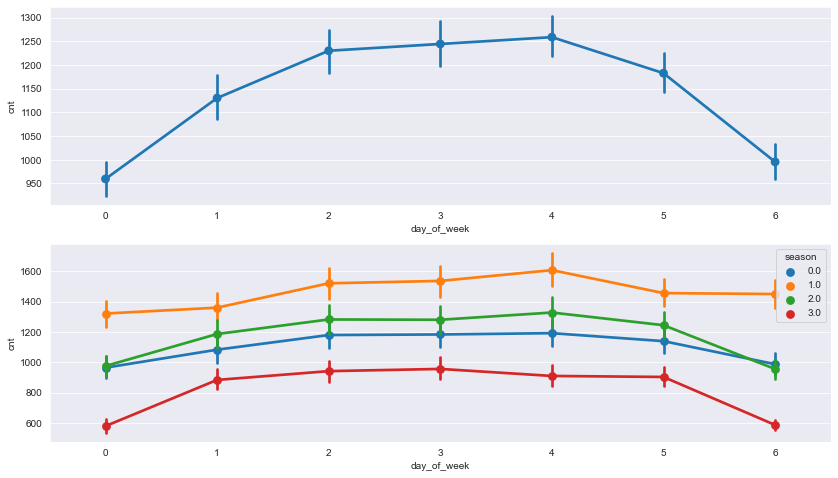

In [103]:
fig, ax =plt.subplots(2,1,figsize=(14,8))
sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[0]);
sns.pointplot(data=df, x="day_of_week", y="cnt", hue="season", ax=ax[1]);

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

In [105]:
month_days_cnt=df.groupby("day_of_month")[["cnt"]].mean().T.astype("int64")

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


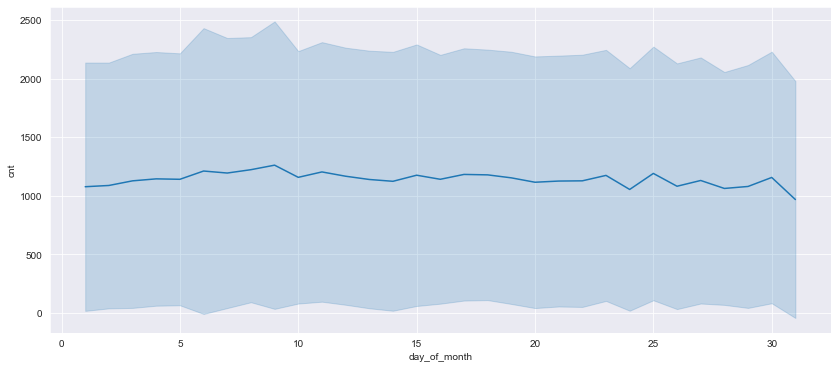

In [106]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="day_of_month", y="cnt",estimator=np.mean, ci="sd")
month_days_cnt

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

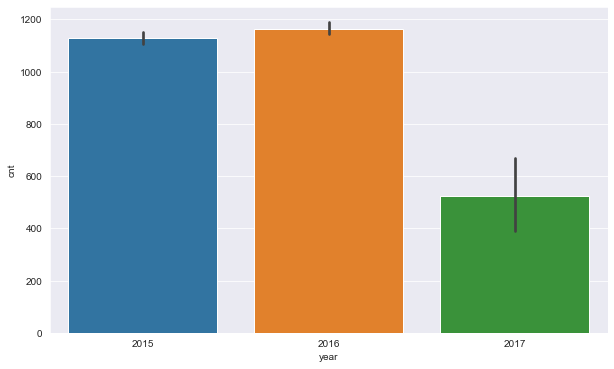

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year", y="cnt");


In [ ]:
# with barplot


In [116]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year_month', 'year', 'month', 'day_of_month',
       'day_of_week', 'hour'],
      dtype='object')

In [117]:
h=df.groupby(["season","is_holiday"])["cnt"].mean()
h

season  is_holiday
0.0     0.0           1113.428129
        1.0            893.807292
1.0     0.0           1470.567873
        1.0            912.812500
2.0     0.0           1178.954218
3.0     0.0            830.868371
        1.0            556.055556
Name: cnt, dtype: float64

In [ ]:
h.rename(columns={1.0:"holiday"})

In [ ]:
h.dropna(axis=0, inplace=True)

In [ ]:
sns.barplot(data=h, x="season", y="holiday")

In [ ]:
pwd

In [ ]:
sns.barplot(data=df, x="season", y="cnt", hue="is_holiday")  # :))))

In [ ]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [56]:
a=df.is_weekend.value_counts()
a.index=["weekday","weekend"]
a

weekday    12444
weekend     4970
Name: is_weekend, dtype: int64

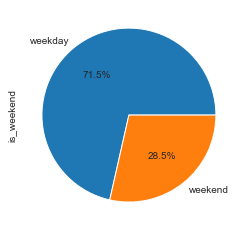

In [114]:
a.plot.pie(autopct='%1.1f%%');


In [ ]:
# pie chart

In [ ]:
s=df.is_weekend.value_counts().values.sum()
s

In [ ]:
df.is_weekend.value_counts(normalize=True).values*100


In [ ]:
y=df.is_weekend.value_counts()
y

In [ ]:
sns.countplot(data=df, x="is_weekend")
for index, value in enumerate(y):
    plt.text(index, value+5, f"%{value*100/s:.3}-{value}", ha="center", va="bottom")

In [ ]:
# with countplot



### 16.Plot the distribution of weather code by seasons

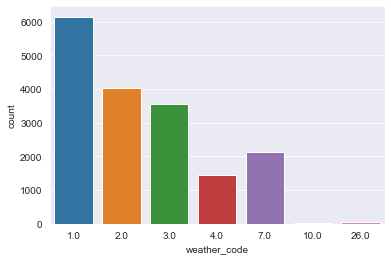

In [112]:
sns.countplot(data=df,x="weather_code");

In [ ]:
# with countplot


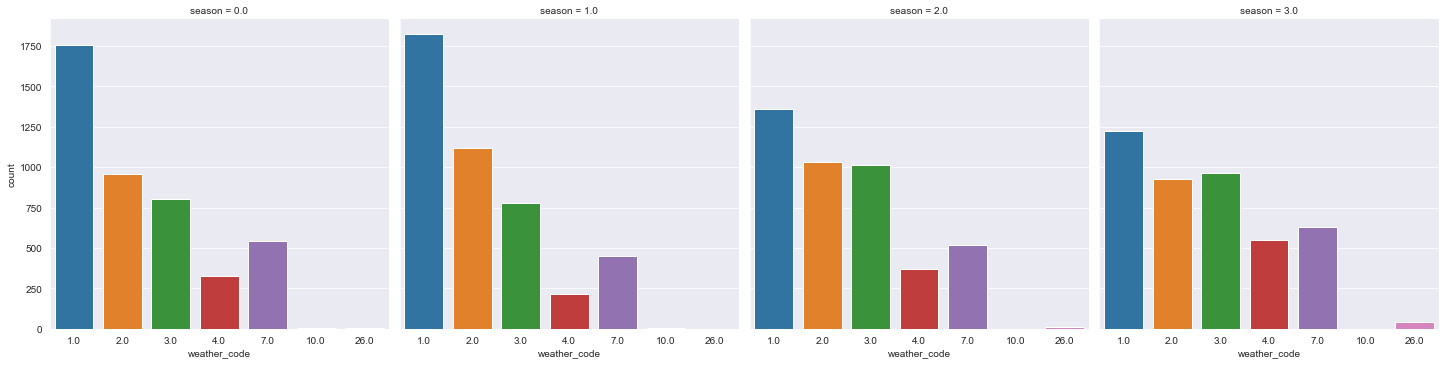

In [113]:
sns.catplot(kind="count", data=df, x="weather_code", col="season")

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

In [110]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year_month', 'year', 'month', 'day_of_month',
       'day_of_week', 'hour'],
      dtype='object')

In [111]:
df.t1

timestamp
2015-01-04 00:00:00    3.0
2015-01-04 01:00:00    3.0
2015-01-04 02:00:00    2.5
2015-01-04 03:00:00    2.0
2015-01-04 04:00:00    2.0
                      ... 
2017-01-03 19:00:00    5.0
2017-01-03 20:00:00    5.0
2017-01-03 21:00:00    5.5
2017-01-03 22:00:00    5.5
2017-01-03 23:00:00    5.0
Name: t1, Length: 17414, dtype: float64

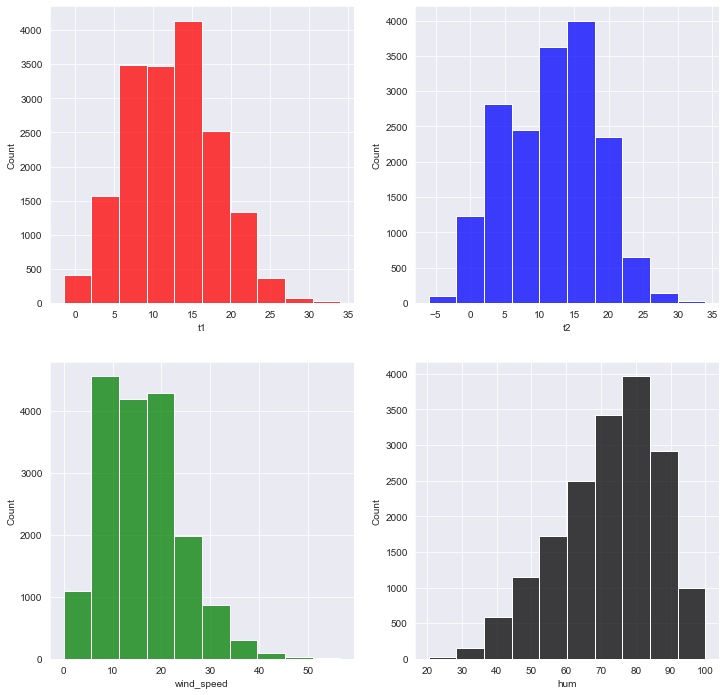

In [109]:
fig, ax=plt.subplots(2,2,figsize=(12,12))
sns.histplot(data=df, x="t1", bins=10, color="red", ax=ax[0,0])
sns.histplot(data=df, x="t2", bins=10, color="blue", ax=ax[0,1])
sns.histplot(data=df, x="wind_speed", bins=10, color="green", ax=ax[1,0])
sns.histplot(data=df, x="hum", bins=10, color="black", ax=ax[1,1]);

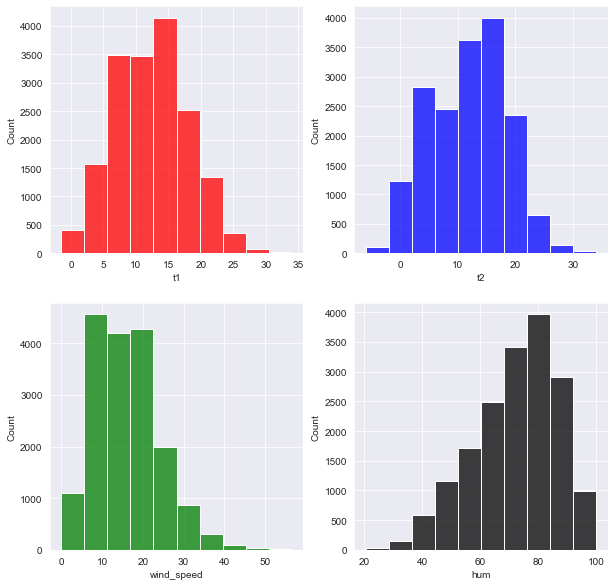

In [108]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=df, x="t1", bins=10, color="red")
plt.subplot(2,2,2)
sns.histplot(data=df, x="t2", bins=10, color="blue")
plt.subplot(2,2,3)
sns.histplot(data=df, x="wind_speed", bins=10, color="green")
plt.subplot(2,2,4)
sns.histplot(data=df, x="hum", bins=10, color="black");

In [ ]:
# matplotlip hist


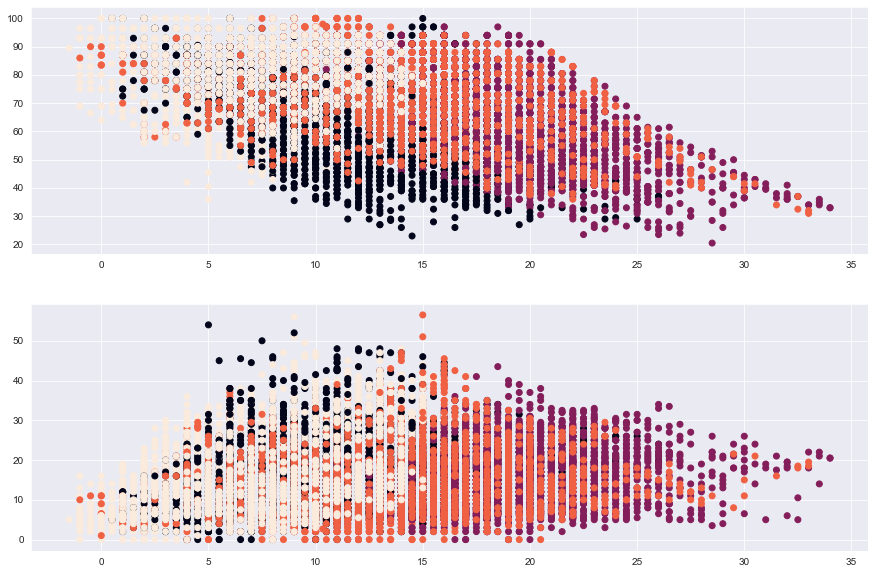

In [107]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season")
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season");

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___